# Rede Neural Convolucional

### Importando as Bibliotecas necessárias

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

### Carregando os dados MNIST

Vamos primeiramente dividir os dados entre as imagens de atributos e classes, treino e teste.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(np.unique(y_train))

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


> ### Nosso modelo ira receber 60.000 imagens para ser treinado e 10.000 imagens para ser testado, cada imagem com 28px por 28px. Além disso, existem 9 classes diferentes de imagens, representados os números: 1, 2, 3, 4, 5, 6, 7, 8, 9 e 0

#### Agora, vamos ver como as imagens que nossa CNN vai receber se parecem.

In [6]:
display(px.imshow(x_train[1], binary_string=True))
print(f" Classe da Imagem: {y_train[1]}")

 Classe da Imagem: 0


##### Nosso modelo vai receber uma imagem parecida com essa. Devemos perceber que, por mais que nós possamos facilmente reconhecer que isso é um zero, para uma máquina, é apenas um conjunto de valores numéricos representando a intensidade de pixels. Além disso, o desafio aumenta porque os "zeros" no dataset podem variar bastante em formato, espessura dos traços e até mesmo em inclinação ou ruído. Esses fatores tornam o reconhecimento muito mais difícil para a máquina, exigindo que o modelo seja treinado para identificar padrões consistentes, mesmo com essas variações.

> ##### A partir disso, vamos fazer um pré-processamento para que fique mais fácil para a nossa CNN reconhecer as imagens.

## Pré-Processamento

> ### Vamos fazer o Ajuste do formato, a conversão do tipo dos pixels e a normalização dos pixels

#### Vamos dizer para o modelo calcular automaticamente quantas amostra ele vai receber (60.000), qual sera o tamanho da imagem (20px x 28px) e qual sera seu canal (1), que em nosso caso sera o da escala de cinza. Além disso, estamos transformando os pixels da imagem em um número decimal (número de ponto flutuante ou float32) e estamos dividindo esse número por 255, para fazermos a normalização desses valores e ficarem na faixa de 0 e 1.

 Pequena explicação do por que 255: Em uma imagem de 8 bits por canal, cada pixel é representado por um número que ocupa 8 bits na memória. Como 8 bits permitem $2^8 = 256 $ valores diferentes, os pixels podem assumir valores inteiros que variam de 0 a 255, em que 0 representa preto absoluto (ausência de luz), 255 representa branco absoluto (máxima intensidade) e os valores intermediários representam tons de cinza em uma imagem em escala de cinza. Sabendo disso, se dividirmos os valores desses pixels por 255, teremos valores entre 0 e 1. pois:
- $0 ÷ 255 = 0$;
- $128 ÷ 255 ≈ 0.502$;
- $255 ÷ 255 = 1$

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

#### Agora, vamos usar uma função do keras "to_categorical", para transformarmos as classes das imagens em arrays com seus valores(em nosso caso, 10): [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].

#### No exemplo acima, o valor que esta sendo representado é o 2, pois existe a classe 0 representado pelo valor de índice 0, a classe 1 representada pelo valor de índice 1, a classe 2 representada pelo valor de índice 2 e assim por diante. Os valores preenchidos com "0", representam um falso, ou seja, não é aquela classe que esta sendo representada, ao contrário do 1, que representa verdadeiro.

> #### Essa é uma técnica que melhora o desempenho de nosso modelo. Essa função é parecida com a função do pandas "get_dummies", mas são para contextos diferentes.

In [6]:
# Converter as classes para one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Criação da CNN

##### Agora, vamos criar de fato nossa CNN (convolutional neural network ou Rede Neural Convolucional). Vamos usar um modelo sequencial, onde as camadas são empilhadas em ordem, da entrada até a saída.

##### A rede inclui camadas convolucionais, pooling, um passo de achatamento (flatten), e camadas densamente conectadas (fully connected) para realizar classificação.

In [7]:
model = models.Sequential([
    # Primeira camada de convolução
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Segunda camada de convolução
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Achatar os dados (flatten) para Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes de dígitos (0-9)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Essa parte do código configura o processo de treinamento da rede neural, especificando o otimizador, a função de perda e as métricas de avaliação que serão usadas. Preparando o modelo para o treinamento, vinculando as configurações fundamentais para ajustar os pesos da rede neural.

In [8]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Treinando o Modelo

E agora, após toda a configuração, vamos finalmente treinar nosso modelo. Vamos fazer isso em 5 épocas, com 64 imagens por lote e usando $10%$ dos dados para a validação.
Estamos armazenando na variável "history" os resultados de cada época, como a perda e a acurácia, tanto para o conjunto de treinamento quanto para o de validação.

In [9]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8810 - loss: 0.3980 - val_accuracy: 0.9840 - val_loss: 0.0589
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9841 - loss: 0.0512 - val_accuracy: 0.9865 - val_loss: 0.0438
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9891 - loss: 0.0341 - val_accuracy: 0.9900 - val_loss: 0.0365
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0264 - val_accuracy: 0.9883 - val_loss: 0.0408
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9885 - val_loss: 0.0393


## Avaliando o Modelo

Após o treinamento, vamo avaliar a acurácia do nosso modelo com nossos dados de teste.

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nAcurácia do Test: {test_acc:.2f}')

313/313 - 2s - 8ms/step - accuracy: 0.9880 - loss: 0.0357

Acurácia do Test: 0.99


### Conseguimos uma acurácia excelente! Para podermos visualizar nosso as predições do nosso modelo, vamos carregar as predições dele em uma variável e carregar juntamente com as imagens

In [11]:
# Visualizar algumas predições
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


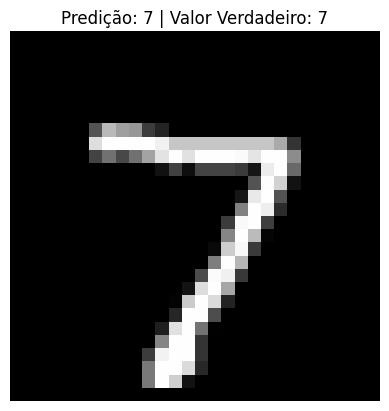

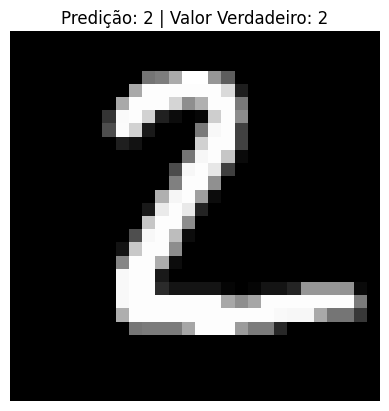

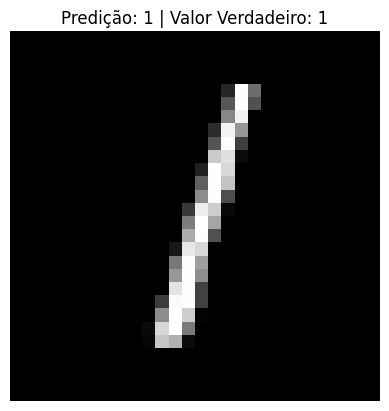

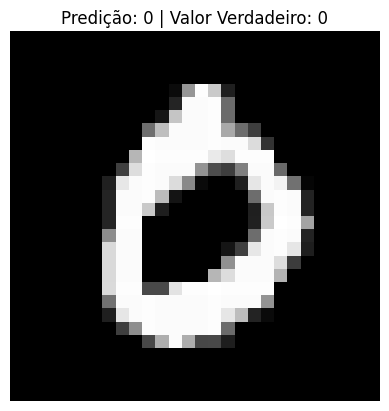

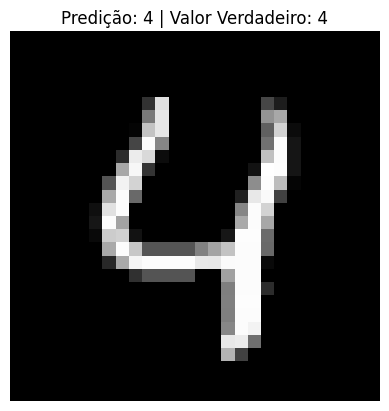

In [14]:
for i in range(5):  # Exibe as 5 primeiras imagens e predições
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Redimensiona corretamente
    plt.title(f"Predição: {np.argmax(predictions[i])} | Valor Verdadeiro: {np.argmax(y_test[i])}")
    plt.axis('off')  # Remove os eixos para clareza
    plt.show()
